In [8]:
import numpy as np
import pandas as pd

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

%matplotlib inline

In [14]:
recipe = pd.read_csv('recipe_muffin_cupcake.csv')
print(recipe.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


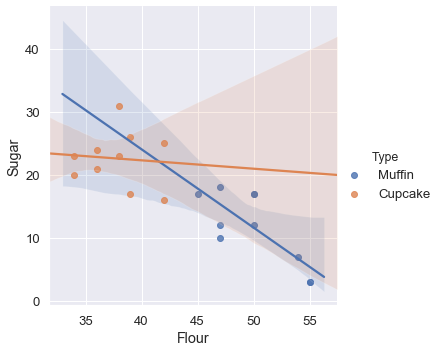

In [15]:
sns.lmplot('Flour', 'Sugar', data = recipe, hue = 'Type')

In [31]:
#formatting data
type_label = np.where(recipe['Type'] == 'Muffin', 0, 1)
recipe_features = recipe.columns.values[1:].tolist()
recipe_features
ingredients = recipe[['Flour', 'Sugar']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [48]:
#fit model
model = svm.SVC(kernel = 'linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
#get the separating hyperplane
w = model.coef_[0] #represents 2 coefficients
a = -w[0]/w[1]
xx = np.linspace(30, 60)
yy = a*xx - model.intercept_[0] / w[1]
print(yy)

#plot parallels to the separating hyperplane
yy_down = a*xx + (model.support_vectors_[0][1] - a*model.support_vectors_[0][0])
yy_up = a*xx + (model.support_vectors_[-1][1] - a*model.support_vectors_[-1][0])

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 -1.02378549e+15 -1.54885769e+15 -2.07392989e+15 -2.59900208e+15
 -3.12407428e+15 -3.64914648e+15 -4.17421867e+15 -4.69929087e+15
 -5.22436307e+15 -5.74943526e+15 -6.27450746e+15 -6.79957966e+15
 -7.32465185e+15 -7.84972405e+15 -8.37479625e+15 -8.89986844e+15
 -9.42494064e+15 -9.95001284e+15 -1.04750850e+16 -1.10001572e+16
 -1.15252294e+16 -1.20503016e+16 -1.25753738e+16 -1.31004460e+16
 -1.36255182e+16 -1.41505904e+16]


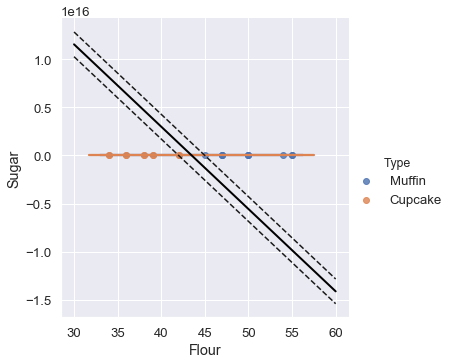

In [53]:
sns.lmplot('Flour', 'Sugar', data = recipe, hue = 'Type')
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [55]:
#create function to predict muffin or cupcake
def muf_or_cup(flour, sugar):
    if (model.predict([[flour, sugar]])) == 0:
        print("Muffin!")
    else:
        print("Cupcake")
        
muf_or_cup(50, 20)

Muffin!


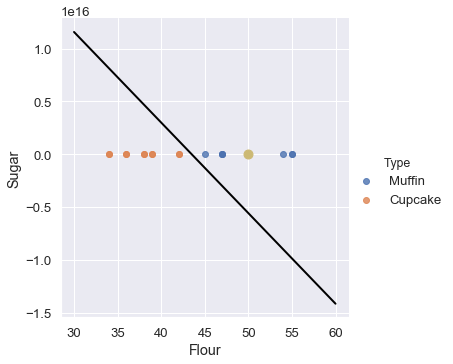

In [61]:
#plotting from def of 50, 20
sns.lmplot('Flour', 'Sugar', data = recipe, hue = 'Type', fit_reg = False)
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(50, 20, 'yo', markersize = '9')

In [62]:
#diff learning method (supervised i believe)
%matplotlib inline

In [64]:
data = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-with-R-Third-Edition/master/Chapter02/usedcars.csv')
print(data.head())

   year model  price  mileage   color transmission
0  2011   SEL  21992     7413  Yellow         AUTO
1  2011   SEL  20995    10926    Gray         AUTO
2  2011   SEL  19995     7351  Silver         AUTO
3  2011   SEL  17809    11613    Gray         AUTO
4  2012    SE  17500     8367   White         AUTO


In [74]:
#using SQLite3
import sqlite3
con = sqlite3.connect('example.db')
cur = con.cursor()
#Creating table
cur.execute('''CREATE TABLE stockss (date TEXT, trans TEXT, symbol TEXT NOT NULL, qty REAL, price REAL)''')
cur.execute("INSERT INTO stockss VALUES ('2006-01-05','BUY','RHAT',100,35.14)")
con.commit() #saves data
con.close()